In [1]:
!pip install opencv-python

In [2]:
import cv2

[[ 63  98  19]
 [242 103 245]]
[[63 98 19]
 [63 98 19]
 [63 98 19]
 ...
 [63 98 19]
 [63 98 19]
 [63 98 19]]


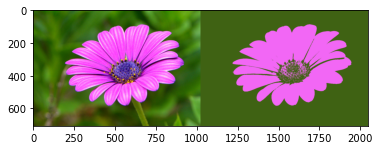

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#Read in the image
image = cv2.imread('flower1.jpeg')

#Change color to RGB (from BGR)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)

#Reshaping the image into a 2D array of pixels and 3 color values(RGB)
pixel_vals = image.reshape((-1,3))

#Convert to float type
pixel_vals = np.float32(pixel_vals)

#The below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are the run or the epsilon(which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

#Then perform k-means clustering with h number of clusters defined as 3
#also random centres are initially chosen for k-means clustering
k=2
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

#Convert data into a 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
print(centers)
print(segmented_data)

#Reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
plt.imshow(segmented_image)

image_concat = np.concatenate((image, segmented_image), axis=1)
plt.imshow(image_concat)
